In [53]:
# %pip install pandas
# %pip install matplotlib
# %pip install scipy
# %pip install seaborn
# %pip install numpy

In [54]:
import pandas
import matplotlib.pyplot
import seaborn
import numpy

In [8]:
survey = pandas.read_csv('../data/Students Perceptions of AI in Education/Survey.csv')
survey.head()

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7


**Question 1:** On a scale of 1 to 10, how informed do you think you are about the concept of artificial intelligence? (1-not informed at all, 10-extremely informed)

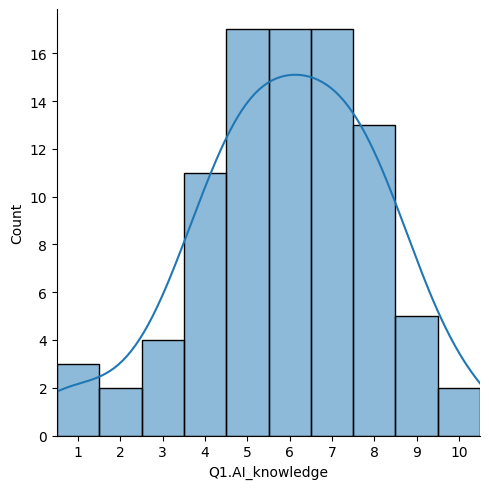

,Q1.AI_knowledge
count,91.000000
mean,5.912088
std,1.970044
min,1.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


In [134]:
plot = seaborn.displot( survey['Q1.AI_knowledge'], bins = 10, kde = True )

bin_edges = numpy.linspace( survey['Q1.AI_knowledge'].min(), survey['Q1.AI_knowledge'].max(), 11 )
tick_positions = ( bin_edges[:-1] + bin_edges[1:] ) / 2
for ax in plot.axes.flat:
    ax.set_xticks( tick_positions )
    ax.set_xticklabels( range( 1, 11 ) )
    ax.set_xlim( bin_edges[0], bin_edges[-1] )

matplotlib.pyplot.show()

pandas.DataFrame( survey['Q1.AI_knowledge'].describe() )

**Question 2:** What sources do you use to learn about the concept of artificial intelligence?

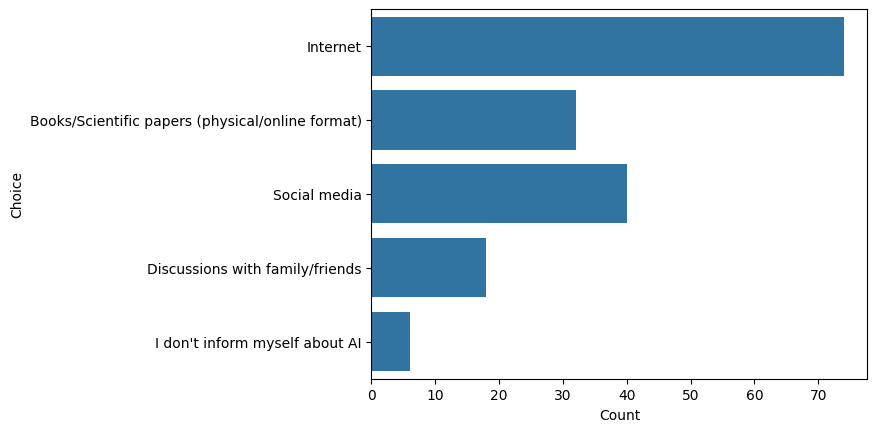

In [ ]:
split_responses = [ response.split(';') for response in survey['Q2.AI_sources'] ]
counter = {}
for response in split_responses:
    for choice in response:
        if choice in counter:
            counter[ choice ] += 1
        else:
            counter[ choice ] = 1

seaborn.barplot(
    pandas.DataFrame( list( counter.items() ), columns = ['Choice', 'Count'] ),
    y = 'Choice',
    x = 'Count'
)
matplotlib.pyplot.show()